<a href="https://colab.research.google.com/github/caltunay/selfIsolation_TR_text_gen/blob/main/4_TR_Tweet_Generator_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extended tweets are now included, starting over

In [ ]:
path2 = '/content/drive/MyDrive/Colab Notebooks/Tweet Generator - TR/zayt_ext_4k.csv'

zayt = pd.read_csv(path2)
zayt.sample(5)

,Unnamed: 0,author,favorite_count,full_text,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,lang,quoted_status_id,quoted_status_id_str,retweet_count,source,source_url,user
2576,2576,zaytung,347.0,"Halkın Sesi - ""Fly Girls: Final Payload"" adlı ...",9.029956e+17,902995632696287232,NaN,NaN,NaN,NaN,NaN,tr,NaN,NaN,113.0,Twitter Web Client,http://twitter.com,zaytung
2869,2869,zaytung,442.0,YTÜ Kampüsünün Ardından Vodafone Arena'nın da ...,8.671199e+17,867119932357697538,NaN,NaN,NaN,NaN,NaN,tr,NaN,NaN,209.0,Twitter Web Client,http://twitter.com,zaytung
3040,3040,zaytung,423.0,FotoHaber - Galatasaray Yönetim Kurulu: ''Haka...,8.463526e+17,846352576757088256,NaN,NaN,NaN,NaN,NaN,tr,NaN,NaN,168.0,Twitter Web Client,http://twitter.com,zaytung
2951,2951,zaytung,1244.0,Daha Hızlı Sonuç Alınması İçin Devletteki FETÖ...,8.576324e+17,857632386187763712,NaN,NaN,NaN,NaN,NaN,tr,NaN,NaN,783.0,Twitter Web Client,http://twitter.com,zaytung
341,341,zaytung,3443.0,FotoHaber - AKP Grup Başkan Vekili: ''400.000 ...,1.285567e+18,1285567441893031937,NaN,NaN,NaN,NaN,NaN,tr,NaN,NaN,368.0,Twitter Web App,https://mobile.twitter.com,zaytung


In [ ]:
zayt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3219 entries, 0 to 3218
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3219 non-null   int64  
 1   author                     3219 non-null   object 
 2   favorite_count             3219 non-null   float64
 3   full_text                  3219 non-null   object 
 4   id                         3219 non-null   float64
 5   id_str                     3219 non-null   int64  
 6   in_reply_to_screen_name    2 non-null      object 
 7   in_reply_to_status_id      2 non-null      float64
 8   in_reply_to_status_id_str  2 non-null      float64
 9   in_reply_to_user_id        2 non-null      float64
 10  in_reply_to_user_id_str    2 non-null      float64
 11  lang                       3219 non-null   object 
 12  quoted_status_id           11 non-null     float64
 13  quoted_status_id_str       11 non-null     float

In [ ]:
cols_ = 'favorite_count full_text retweet_count source source_url'.split()
zayt = zayt.iloc[zayt.index.difference(zayt.dropna(subset = ['in_reply_to_screen_name','quoted_status_id'], how = 'all').index),:][cols_]
zayt

,favorite_count,full_text,retweet_count,source,source_url
0,1397.0,FotoHaber - Seçimle gitmeyi yediremeyen diktat...,113.0,Twitter Web App,https://mobile.twitter.com
1,1800.0,FotoHaber - Melih Bulu: ''Metallica albüm kapa...,107.0,Twitter Web App,https://mobile.twitter.com
2,2251.0,Son Dakika - Korkudan Berat Albayrak'ın istifa...,223.0,Twitter Web App,https://mobile.twitter.com
3,4725.0,Piyasalarda Bugün: Yılbaşından Kalan 4 Kutu Bi...,356.0,Twitter Web App,https://mobile.twitter.com
4,2434.0,Son Dakika - %30'dan fazla olan enflasyonu %14...,275.0,Twitter Web App,https://mobile.twitter.com
...,...,...,...,...,...
3214,895.0,Müslümanları Ülkeye Sokmama Kararnamesi Mahkem...,518.0,Twitter Web Client,http://twitter.com
3215,546.0,Facebook’ta Her Yazdığı En Az 400 Like Alan Kı...,150.0,Twitter Web Client,http://twitter.com
3216,73.0,Sinema - Vizyonda Bu Hafta: Vezir Parmağı (Mah...,19.0,Twitter Web Client,http://twitter.com
3217,529.0,FotoHaber - Merkez Bankası'ndan flaş kredi not...,272.0,Twitter Web Client,http://twitter.com


In [ ]:
rand_ind = np.random.randint(0, len(zayt), 10)

for i in rand_ind:
    print('\n==============')
    print(zayt['full_text'].values[i])
    print('==============\n')


30 Bin Hasta Arasından Sıyrılarak 1500 Kişilik Günlük Covid Vaka Tablosu'na Girmeyi Başaran Fabrika İşçisi, Çayıralan'ın Gururu Oldu... https://t.co/ypvLQ3CEQN https://t.co/CELDtsH5VK


İnternette Çözdüğü Bir Testte Daha "Dahi" Çıkan Genç Bankacı, %2'lik Maaş Zammına İtiraz Etmeye Hazırlanıyor... https://t.co/DQHXzdGE1e https://t.co/gGRBSsQ6Vt


Koronavirüs'te Bu Kez İyi Haber: Mutasyon Geçiren Balyöz Ailesi Fotosentez'le Beslenmeye Başladı... https://t.co/jmYTryQgHK https://t.co/W1FwFwKokb


Son Dakika - ''Ekonomide tarih yazmaya devam ediyoruz'' açıklaması yapan Berat Albayrak’ın hangi ülkede bakanlık yaptığının araştırılması için komisyon kurulması teklifi AKP ve MHP oylarıyla reddedildi... https://t.co/Sb3JRNzzts


Son Dakika - Cumhurbaşkanı Erdoğan, Kadir Mısıroğlu’nun vefatı nedeniyle Çipras'a taziyelerini iletti... https://t.co/W8ftAbbkGC https://t.co/9DLjbk2ilb


FotoHaber - FETÖ'nün ordu içinden temizlenmesi, İsmailağa Cemaati'nde de yüzleri güldürüyor... https://t.co/UHxMQio

In [ ]:
zayt['header_text'] = zayt['full_text'].apply(lambda sentence_: ' '.join([word for word in sentence_.split() if 'http' not in word]))
zayt

,favorite_count,full_text,retweet_count,source,source_url,header_text
0,1397.0,FotoHaber - Seçimle gitmeyi yediremeyen diktat...,113.0,Twitter Web App,https://mobile.twitter.com,FotoHaber - Seçimle gitmeyi yediremeyen diktat...
1,1800.0,FotoHaber - Melih Bulu: ''Metallica albüm kapa...,107.0,Twitter Web App,https://mobile.twitter.com,FotoHaber - Melih Bulu: ''Metallica albüm kapa...
2,2251.0,Son Dakika - Korkudan Berat Albayrak'ın istifa...,223.0,Twitter Web App,https://mobile.twitter.com,Son Dakika - Korkudan Berat Albayrak'ın istifa...
3,4725.0,Piyasalarda Bugün: Yılbaşından Kalan 4 Kutu Bi...,356.0,Twitter Web App,https://mobile.twitter.com,Piyasalarda Bugün: Yılbaşından Kalan 4 Kutu Bi...
4,2434.0,Son Dakika - %30'dan fazla olan enflasyonu %14...,275.0,Twitter Web App,https://mobile.twitter.com,Son Dakika - %30'dan fazla olan enflasyonu %14...
...,...,...,...,...,...,...
3214,895.0,Müslümanları Ülkeye Sokmama Kararnamesi Mahkem...,518.0,Twitter Web Client,http://twitter.com,Müslümanları Ülkeye Sokmama Kararnamesi Mahkem...
3215,546.0,Facebook’ta Her Yazdığı En Az 400 Like Alan Kı...,150.0,Twitter Web Client,http://twitter.com,Facebook’ta Her Yazdığı En Az 400 Like Alan Kı...
3216,73.0,Sinema - Vizyonda Bu Hafta: Vezir Parmağı (Mah...,19.0,Twitter Web Client,http://twitter.com,Sinema - Vizyonda Bu Hafta: Vezir Parmağı (Mah...
3217,529.0,FotoHaber - Merkez Bankası'ndan flaş kredi not...,272.0,Twitter Web Client,http://twitter.com,FotoHaber - Merkez Bankası'ndan flaş kredi not...


In [ ]:
sentence_ = zayt['header_text'].values[0]
sentence_

'FotoHaber - Seçimle gitmeyi yediremeyen diktatör özentisinin, destekçilerini amatör teröristlere dönüştürme hızı tüm dünyada ilgiyle izleniyor...'

In [ ]:
# extract text and headers and replace 3 dots with 1 
zayt['text_only'] = zayt['header_text'].apply(lambda sentence: sentence.split(' - ')[1].replace('...','.') if len(sentence.split(' - ')) > 1 else sentence.split(' - ')[0].replace('...', '.'))
zayt['text_only'][0]

'Seçimle gitmeyi yediremeyen diktatör özentisinin, destekçilerini amatör teröristlere dönüştürme hızı tüm dünyada ilgiyle izleniyor.'

In [ ]:
# do other way and create header_only column -where exists
zayt['header_only'] = zayt['header_text'].apply(lambda sentence: sentence.split(' - ')[0].replace('...','.') if len(sentence.split(' - ')) > 1 else np.nan)
zayt['header_only']

0        FotoHaber
1        FotoHaber
2       Son Dakika
3              NaN
4       Son Dakika
           ...    
3214           NaN
3215           NaN
3216        Sinema
3217     FotoHaber
3218           NaN
Name: header_only, Length: 3206, dtype: object

In [ ]:
zayt['header_only'].value_counts()

FotoHaber                                                                873
Son Dakika                                                               377
Halkın Sesi                                                              125
Blog                                                                     118
VideoHaber                                                                72
Zaytung Sinema                                                            72
Zaytung Blog                                                              57
Sinema                                                                    53
Zaytung Dergi                                                             39
Anket                                                                     22
Spor                                                                      21
Dergi                                                                     12
Kitap                                                                      9

In [ ]:
# bad extraction where header count is 2 and under. remove those rows
to_remove_headers = zayt['header_only'].value_counts()[zayt['header_only'].value_counts() <= 2].index.tolist()

zayt = zayt[~zayt['header_only'].isin(to_remove_headers)].reset_index(drop = True)

In [ ]:
zayt['favorite_count'].corr(zayt['retweet_count'])

0.32606206916890057

In [ ]:
import seaborn as sns
by_header = zayt.groupby('header_only').sum().reset_index()

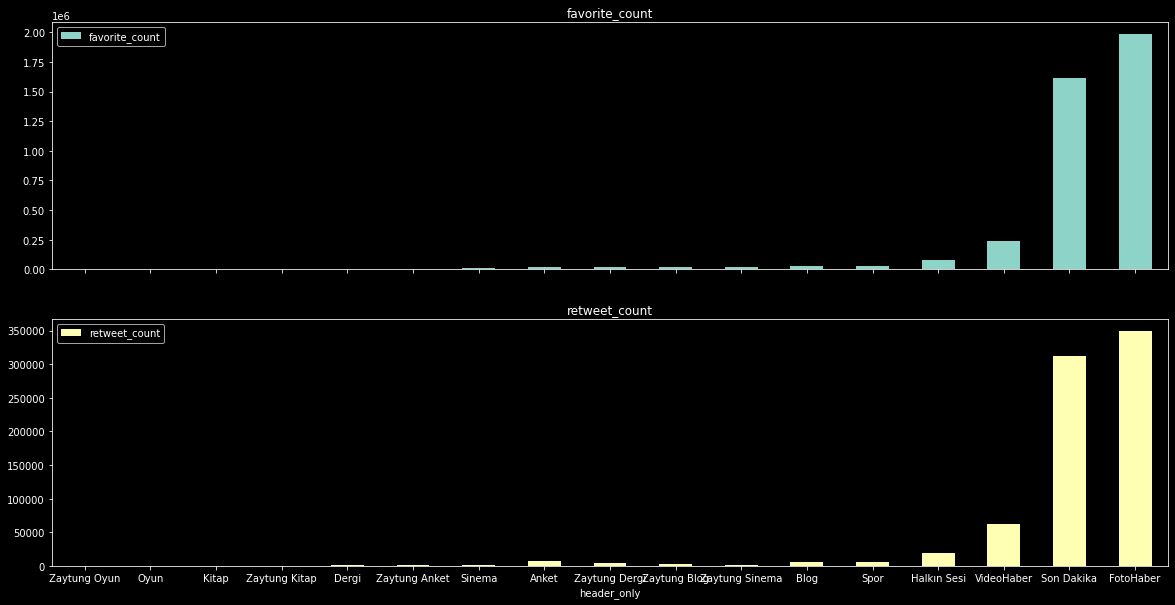

In [ ]:
plt.style.use('dark_background')
by_header.sort_values(by = 'favorite_count').plot.bar(x = 'header_only', rot = 0, subplots = True, figsize = (20, 10));

In [ ]:
rand_ind = np.random.randint(0, len(zayt), 10)

for i in rand_ind:
    print('\n==============')
    print(zayt['text_only'].values[i].lower())
    print('==============\n')


i̇stanbul halkına karşı taksi plakası sahiplerinin rant hakkını sonuna kadar savunan valilik ve bakanlık temsilcileri, saray'dan tam puan aldı.


akp'li belediye başkanlarının tehdit, hdp'lilerin kayyum, chp'lilerin soruşturmayla görevden alınmasının ardından 2019 yerel seçimleri i̇çin en güçlü parti haline gelen mhp'de yüzler gülüyor.


yök başkanı'ndan öğrencilere müjde: ''seçim ikinci tura kalırsa bir hafta daha kazanırsınız.''


suriye'den türkiye'ye atılan roket sonucunda 1 suriye vatandaşı hayatını kaybetti.


merkez bankası, açıklanan enflasyondan gerçek enflasyona ulaşmak için kullanılan 2.5 çarpanında ise şu aşamada bir değişiklik düşünülmediğini açıkladı.


erdoğan'ın son grup toplantısında ''çocuklarım aç, bana yardım edin'' diye feryat eden vatandaş şaşkınlık yarattı: ''halk oraya kadar nasıl sızmış?''


11 yaşında 70 kg ağırlığında bir çocuğun 4.5 metre uzağa atlayabileceğini iddia eden giresun cumhuriyet savcılığı: ''ülkemize uzun atlamada madalyalar kazandırabilecek bir

In [ ]:
zayt['contains_mention'] = zayt['text_only'].str.contains('@')
zayt

,favorite_count,full_text,retweet_count,source,source_url,header_text,text_only,header_only,contains_mention
0,1397.0,FotoHaber - Seçimle gitmeyi yediremeyen diktat...,113.0,Twitter Web App,https://mobile.twitter.com,FotoHaber - Seçimle gitmeyi yediremeyen diktat...,Seçimle gitmeyi yediremeyen diktatör özentisin...,FotoHaber,False
1,1800.0,FotoHaber - Melih Bulu: ''Metallica albüm kapa...,107.0,Twitter Web App,https://mobile.twitter.com,FotoHaber - Melih Bulu: ''Metallica albüm kapa...,Melih Bulu: ''Metallica albüm kapağı gibi deği...,FotoHaber,False
2,2251.0,Son Dakika - Korkudan Berat Albayrak'ın istifa...,223.0,Twitter Web App,https://mobile.twitter.com,Son Dakika - Korkudan Berat Albayrak'ın istifa...,Korkudan Berat Albayrak'ın istifasını bile anc...,Son Dakika,False
3,4725.0,Piyasalarda Bugün: Yılbaşından Kalan 4 Kutu Bi...,356.0,Twitter Web App,https://mobile.twitter.com,Piyasalarda Bugün: Yılbaşından Kalan 4 Kutu Bi...,Piyasalarda Bugün: Yılbaşından Kalan 4 Kutu Bi...,NaN,False
4,2434.0,Son Dakika - %30'dan fazla olan enflasyonu %14...,275.0,Twitter Web App,https://mobile.twitter.com,Son Dakika - %30'dan fazla olan enflasyonu %14...,%30'dan fazla olan enflasyonu %14 hesaplayıp m...,Son Dakika,False
...,...,...,...,...,...,...,...,...,...
3181,895.0,Müslümanları Ülkeye Sokmama Kararnamesi Mahkem...,518.0,Twitter Web Client,http://twitter.com,Müslümanları Ülkeye Sokmama Kararnamesi Mahkem...,Müslümanları Ülkeye Sokmama Kararnamesi Mahkem...,NaN,False
3182,546.0,Facebook’ta Her Yazdığı En Az 400 Like Alan Kı...,150.0,Twitter Web Client,http://twitter.com,Facebook’ta Her Yazdığı En Az 400 Like Alan Kı...,Facebook’ta Her Yazdığı En Az 400 Like Alan Kı...,NaN,False
3183,73.0,Sinema - Vizyonda Bu Hafta: Vezir Parmağı (Mah...,19.0,Twitter Web Client,http://twitter.com,Sinema - Vizyonda Bu Hafta: Vezir Parmağı (Mah...,Vizyonda Bu Hafta: Vezir Parmağı (Mahsun Kırmı...,Sinema,False
3184,529.0,FotoHaber - Merkez Bankası'ndan flaş kredi not...,272.0,Twitter Web Client,http://twitter.com,FotoHaber - Merkez Bankası'ndan flaş kredi not...,Merkez Bankası'ndan flaş kredi notu hamlesi.,FotoHaber,False


In [ ]:
zayt['contains_mention'].value_counts()

False    3103
True       83
Name: contains_mention, dtype: int64

In [ ]:
# drop mentions and retweets

zayt = zayt[zayt['contains_mention'] == False].reset_index(drop = True)

In [ ]:
zayt

,favorite_count,full_text,retweet_count,source,source_url,header_text,text_only,header_only,contains_mention
0,1397.0,FotoHaber - Seçimle gitmeyi yediremeyen diktat...,113.0,Twitter Web App,https://mobile.twitter.com,FotoHaber - Seçimle gitmeyi yediremeyen diktat...,Seçimle gitmeyi yediremeyen diktatör özentisin...,FotoHaber,False
1,1800.0,FotoHaber - Melih Bulu: ''Metallica albüm kapa...,107.0,Twitter Web App,https://mobile.twitter.com,FotoHaber - Melih Bulu: ''Metallica albüm kapa...,Melih Bulu: ''Metallica albüm kapağı gibi deği...,FotoHaber,False
2,2251.0,Son Dakika - Korkudan Berat Albayrak'ın istifa...,223.0,Twitter Web App,https://mobile.twitter.com,Son Dakika - Korkudan Berat Albayrak'ın istifa...,Korkudan Berat Albayrak'ın istifasını bile anc...,Son Dakika,False
3,4725.0,Piyasalarda Bugün: Yılbaşından Kalan 4 Kutu Bi...,356.0,Twitter Web App,https://mobile.twitter.com,Piyasalarda Bugün: Yılbaşından Kalan 4 Kutu Bi...,Piyasalarda Bugün: Yılbaşından Kalan 4 Kutu Bi...,NaN,False
4,2434.0,Son Dakika - %30'dan fazla olan enflasyonu %14...,275.0,Twitter Web App,https://mobile.twitter.com,Son Dakika - %30'dan fazla olan enflasyonu %14...,%30'dan fazla olan enflasyonu %14 hesaplayıp m...,Son Dakika,False
...,...,...,...,...,...,...,...,...,...
3098,895.0,Müslümanları Ülkeye Sokmama Kararnamesi Mahkem...,518.0,Twitter Web Client,http://twitter.com,Müslümanları Ülkeye Sokmama Kararnamesi Mahkem...,Müslümanları Ülkeye Sokmama Kararnamesi Mahkem...,NaN,False
3099,546.0,Facebook’ta Her Yazdığı En Az 400 Like Alan Kı...,150.0,Twitter Web Client,http://twitter.com,Facebook’ta Her Yazdığı En Az 400 Like Alan Kı...,Facebook’ta Her Yazdığı En Az 400 Like Alan Kı...,NaN,False
3100,73.0,Sinema - Vizyonda Bu Hafta: Vezir Parmağı (Mah...,19.0,Twitter Web Client,http://twitter.com,Sinema - Vizyonda Bu Hafta: Vezir Parmağı (Mah...,Vizyonda Bu Hafta: Vezir Parmağı (Mahsun Kırmı...,Sinema,False
3101,529.0,FotoHaber - Merkez Bankası'ndan flaş kredi not...,272.0,Twitter Web Client,http://twitter.com,FotoHaber - Merkez Bankası'ndan flaş kredi not...,Merkez Bankası'ndan flaş kredi notu hamlesi.,FotoHaber,False


(array([  3.,   5.,  42.,  16.,  24.,  51.,  46.,  29.,  30.,  41.,  53.,
         58.,  53.,  75.,  91., 122.,  81., 127., 150., 169., 156., 156.,
        235., 158.,  84., 119., 120., 114., 111.,  64.,  82.,  74.,  62.,
         41.,  50.,  29.,  41.,  22.,  21.,  22.,  16.,   9.,  12.,   7.,
          5.,   2.,   6.,   7.,   6.,   6.]),
 array([  6.  ,  10.76,  15.52,  20.28,  25.04,  29.8 ,  34.56,  39.32,
         44.08,  48.84,  53.6 ,  58.36,  63.12,  67.88,  72.64,  77.4 ,
         82.16,  86.92,  91.68,  96.44, 101.2 , 105.96, 110.72, 115.48,
        120.24, 125.  , 129.76, 134.52, 139.28, 144.04, 148.8 , 153.56,
        158.32, 163.08, 167.84, 172.6 , 177.36, 182.12, 186.88, 191.64,
        196.4 , 201.16, 205.92, 210.68, 215.44, 220.2 , 224.96, 229.72,
        234.48, 239.24, 244.  ]),
 <a list of 50 Patch objects>)

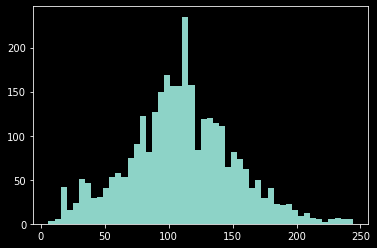

In [ ]:
zayt['twit_len'] = zayt['text_only'].apply(len)

plt.hist(zayt['twit_len'], bins = 50)

In [ ]:
# remove twits shorter than 40 chars
zayt = zayt[zayt['twit_len']>40].reset_index(drop = True)

In [ ]:
zayt

,favorite_count,full_text,retweet_count,source,source_url,header_text,text_only,header_only,contains_mention,twit_len
0,1397.0,FotoHaber - Seçimle gitmeyi yediremeyen diktat...,113.0,Twitter Web App,https://mobile.twitter.com,FotoHaber - Seçimle gitmeyi yediremeyen diktat...,Seçimle gitmeyi yediremeyen diktatör özentisin...,FotoHaber,False,131
1,1800.0,FotoHaber - Melih Bulu: ''Metallica albüm kapa...,107.0,Twitter Web App,https://mobile.twitter.com,FotoHaber - Melih Bulu: ''Metallica albüm kapa...,Melih Bulu: ''Metallica albüm kapağı gibi deği...,FotoHaber,False,53
2,2251.0,Son Dakika - Korkudan Berat Albayrak'ın istifa...,223.0,Twitter Web App,https://mobile.twitter.com,Son Dakika - Korkudan Berat Albayrak'ın istifa...,Korkudan Berat Albayrak'ın istifasını bile anc...,Son Dakika,False,225
3,4725.0,Piyasalarda Bugün: Yılbaşından Kalan 4 Kutu Bi...,356.0,Twitter Web App,https://mobile.twitter.com,Piyasalarda Bugün: Yılbaşından Kalan 4 Kutu Bi...,Piyasalarda Bugün: Yılbaşından Kalan 4 Kutu Bi...,NaN,False,80
4,2434.0,Son Dakika - %30'dan fazla olan enflasyonu %14...,275.0,Twitter Web App,https://mobile.twitter.com,Son Dakika - %30'dan fazla olan enflasyonu %14...,%30'dan fazla olan enflasyonu %14 hesaplayıp m...,Son Dakika,False,153
...,...,...,...,...,...,...,...,...,...,...
2905,895.0,Müslümanları Ülkeye Sokmama Kararnamesi Mahkem...,518.0,Twitter Web Client,http://twitter.com,Müslümanları Ülkeye Sokmama Kararnamesi Mahkem...,Müslümanları Ülkeye Sokmama Kararnamesi Mahkem...,NaN,False,106
2906,546.0,Facebook’ta Her Yazdığı En Az 400 Like Alan Kı...,150.0,Twitter Web Client,http://twitter.com,Facebook’ta Her Yazdığı En Az 400 Like Alan Kı...,Facebook’ta Her Yazdığı En Az 400 Like Alan Kı...,NaN,False,108
2907,73.0,Sinema - Vizyonda Bu Hafta: Vezir Parmağı (Mah...,19.0,Twitter Web Client,http://twitter.com,Sinema - Vizyonda Bu Hafta: Vezir Parmağı (Mah...,Vizyonda Bu Hafta: Vezir Parmağı (Mahsun Kırmı...,Sinema,False,101
2908,529.0,FotoHaber - Merkez Bankası'ndan flaş kredi not...,272.0,Twitter Web Client,http://twitter.com,FotoHaber - Merkez Bankası'ndan flaş kredi not...,Merkez Bankası'ndan flaş kredi notu hamlesi.,FotoHaber,False,44


In [ ]:
text = zayt['text_only'].str.lower()
text

0       seçimle gitmeyi yediremeyen diktatör özentisin...
1       melih bulu: ''metallica albüm kapağı gibi deği...
2       korkudan berat albayrak'ın istifasını bile anc...
3       piyasalarda bugün: yılbaşından kalan 4 kutu bi...
4       %30'dan fazla olan enflasyonu %14 hesaplayıp m...
                              ...                        
2905    müslümanları ülkeye sokmama kararnamesi mahkem...
2906    facebook’ta her yazdığı en az 400 like alan kı...
2907    vizyonda bu hafta: vezir parmağı (mahsun kırmı...
2908         merkez bankası'ndan flaş kredi notu hamlesi.
2909    s&amp;p'dan hükümeti rahatlatan açıklama: "gör...
Name: text_only, Length: 2910, dtype: object

In [ ]:
vocab = sorted(set(''.join(text)))
vocab

In [ ]:
print(len(vocab))

70


In [ ]:
# create char to index, index to char dicts

char_to_ind = {char:ind for ind, char in enumerate(vocab)}
ind_to_char = {ind:char for ind, char in enumerate(vocab)}

In [ ]:
zayt[zayt['text_only'].str.contains('³')]['text_only'].values

array(["Aylar süren mücadelenin ardından sneaker bağımlılığını yendiğini düşünen Mert Toncu'ya PUMA RS-X³ Puzzle şoku. #YeniBoyutlaraDogru"],
      dtype=object)

In [ ]:
# will set input length as 40 also. 
# create input and output lists to be vectorized


max_len = 40
input_data = list()
output_data = list()

for single_tweet in text:
    # loop over text 1 by 1 and 
        for char_ind in range(0, len(single_tweet) - max_len, 1):
            # loop over single tweet and append to input and output
            input_data.append(single_tweet[char_ind : char_ind + max_len])
            output_data.append(single_tweet[char_ind + max_len])

    # input_data.append()
    # output_data.append()



In [ ]:
input_data[0:5]

['seçimle gitmeyi yediremeyen diktatör öze',
 'eçimle gitmeyi yediremeyen diktatör özen',
 'çimle gitmeyi yediremeyen diktatör özent',
 'imle gitmeyi yediremeyen diktatör özenti',
 'mle gitmeyi yediremeyen diktatör özentis']

In [ ]:
output_data[0:5]

['n', 't', 'i', 's', 'i']

In [ ]:
print(len(input_data))

220818


In [ ]:
# vectorization 

x = np.zeros((len(input_data), max_len, len(vocab)), dtype = 'float32')
y = np.zeros((len(output_data), len(vocab)), dtype = 'float32')

In [ ]:
# iterate over tweets
for tweet_ind, tweet in enumerate(input_data):
    # iterate over single tweet
    for char_ind, char in enumerate(tweet):
        x[tweet_ind, char_ind, char_to_ind[char]] = 1 
    y[tweet_ind, char_to_ind[output_data[tweet_ind]]] = 1


In [ ]:
# create baseline model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
import sys

In [ ]:
model = Sequential()

model.add(LSTM(units = 128, input_shape = (max_len, len(vocab))))
model.add(Dense(len(vocab), activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               101888    
_________________________________________________________________
dense (Dense)                (None, 70)                9030      
Total params: 110,918
Trainable params: 110,918
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x, y, epochs = 3, batch_size = 256, validation_split = .2)

Epoch 1/3
691/691 [==============================] - 163s 233ms/step - loss: 3.1368 - accuracy: 0.1694 - val_loss: 2.5511 - val_accuracy: 0.2686
Epoch 2/3
691/691 [==============================] - 157s 226ms/step - loss: 2.4359 - accuracy: 0.2931 - val_loss: 2.3689 - val_accuracy: 0.3083
Epoch 3/3
691/691 [==============================] - 160s 231ms/step - loss: 2.2807 - accuracy: 0.3210 - val_loss: 2.2896 - val_accuracy: 0.3200


In [ ]:
def sample(preds, temperature = 1.0):

    # helper func to sample an index from a prob array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature

    preds = np.exp(preds) / np.sum(np.exp(preds))
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [ ]:
def on_epoch_end(epoch, _):
    # function invoked at end of each epoch. prints generated text
    print()
    print('--- Generating text after epoch: %d' % epoch)

    tweet = np.random.choice(text) # select random tweet
    start_index = 0

    for diversity in [.2, .5, 1.0, 1.2]:
        print('--- Divertsity: ', diversity)

        generated = ''
        sentence = tweet[start_index : start_index + max_len]
        generated += sentence

        print('---- Orgininal Tweet: ', tweet)
        print('---- Generated with seed: "' + sentence + '"' )
        sys.stdout.write(generated)

        for i in range(180):
            x_pred = np.zeros((1, max_len, len(vocab)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_to_ind[char]] = 1

            preds = model.predict(x_pred, verbose = 0)[0]
            next_index = sample(preds, diversity)
            next_char = ind_to_char[next_index]
            
            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        
        print()

In [ ]:
from tensorflow.keras.callbacks import LambdaCallback, EarlyStopping


In [ ]:
epoch_summary = LambdaCallback(on_epoch_end = on_epoch_end)

model.fit(x, y, epochs = 10, batch_size = 128, callbacks = [epoch_summary], validation_split = .2)

Epoch 1/10
1381/1381 [==============================] - 159s 115ms/step - loss: 2.0022 - accuracy: 0.3959 - val_loss: 2.0827 - val_accuracy: 0.3782

--- Generating text after epoch: 0
--- Divertsity:  0.2
---- Generated with seed: "story atamadıklarını fark edince aynı an"
story atamadıklarını fark edince aynı anlan bir de aratlarını başarı olarak i̇çin ara alan bir bir kara bir kararı açıklan yapan arak i̇steriliri i̇çin bir kara
--- Divertsity:  0.5
---- Generated with seed: "story atamadıklarını fark edince aynı an"
story atamadıklarını fark edince aynı anca göçendek dörüzü gere düşünüyor.'' diye i̇çin görden bir olarak sonusonu ekriyor.'' dine olan artıran salındı. mi?'' k
--- Divertsity:  1.0
---- Generated with seed: "story atamadıklarını fark edince aynı an"
story atamadıklarını fark edince aynı anfa deyfe sişimlerini , ketalere belığı caha ftörcik'' ek burdu: ''anbellerina nehanetori. çildiği dağa gerip olucakrır d
--- Divertsity:  1.2
---- Generated with seed: "story atamadıkl

In [ ]:
# from keras.layers import CuDNNLSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
# from tensorflow.compat.v1.keras.models import 

In [ ]:
model2 = Sequential()

model2.add(CuDNNLSTM(units = 1024, input_shape = (max_len, len(vocab)), return_sequences = True))
model2.add(Dropout(.2))
model2.add(CuDNNLSTM(units = 1024))#, return_sequences = True))
model2.add(Dropout(.2))
# model2.add(CuDNNLSTM(units = 128, return_sequences = True))
# model2.add(Dropout(.2))
# model2.add(CuDNNLSTM(units = 128, return_sequences = True))
# model2.add(Dropout(.2))
# model2.add(CuDNNLSTM(units = 128, return_sequences = True))
# model2.add(Dropout(.2))
# model2.add(CuDNNLSTM(units = 128))
# model2.add(Dropout(.2))

model2.add(Dense(len(vocab), activation = 'softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm (CuDNNLSTM)       (None, 40, 1024)          4489216   
_________________________________________________________________
dropout (Dropout)            (None, 40, 1024)          0         
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 1024)              8396800   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 70)                71750     
Total params: 12,957,766
Trainable params: 12,957,766
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def on_epoch_end2(epoch, _):
    # function invoked at end of each epoch. prints generated text
    print()
    print('--- Generating text after epoch: %d' % epoch)

    tweet = np.random.choice(text) # select random tweet
    start_index = 0

    for diversity in [.2, .5, 1.0, 1.2]:
        print('--- Divertsity: ', diversity)

        generated = ''
        sentence = tweet[start_index : start_index + max_len]
        generated += sentence

        print('---- Orgininal Tweet: ', tweet)
        print('---- Generated with seed: "' + sentence + '"' )
        sys.stdout.write(generated)
        
        for i in range(120):
            x_pred = np.zeros((1, max_len, len(vocab)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_to_ind[char]] = 1

            preds = model2.predict(x_pred, verbose = 0)[0]
            next_index = sample(preds, diversity)
            next_char = ind_to_char[next_index]
            
            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        
        print()

In [ ]:
epoch_summary2 = LambdaCallback(on_epoch_end = on_epoch_end2)
earlyStopper = EarlyStopping(monitor = 'val_accuracy', patience = 5)

model2.fit(x, y, epochs = 50, batch_size = 64, callbacks = [epoch_summary2, earlyStopper], validation_split = .25, shuffle = True)

Epoch 1/50
2588/2588 [==============================] - 217s 84ms/step - loss: 1.8019 - accuracy: 0.4506 - val_loss: 1.7836 - val_accuracy: 0.4638

--- Generating text after epoch: 0
--- Divertsity:  0.2
---- Orgininal Tweet:  ''balkanlar'dan gelen soğuk hava dalgası'' bu kez eli boş gelmedi.
---- Generated with seed: "''balkanlar'dan gelen soğuk hava dalgası"
''balkanlar'dan gelen soğuk hava dalgası i̇çin kararını yardım alan ak parti, bir alama yardım etti. siz bu kadar yarattı. siz bu konuda yakıl bir kararını açık
--- Divertsity:  0.5
---- Orgininal Tweet:  ''balkanlar'dan gelen soğuk hava dalgası'' bu kez eli boş gelmedi.
---- Generated with seed: "''balkanlar'dan gelen soğuk hava dalgası"
''balkanlar'dan gelen soğuk hava dalgası i̇çin yakın araya kadar mahalesi, kara yakanız limamın i̇narlığını hazırlanıyor.'' son alan satlar alamak sorun sapte y
--- Divertsity:  1.0
---- Orgininal Tweet:  ''balkanlar'dan gelen soğuk hava dalgası'' bu kez eli boş gelmedi.
---- Generated with seed